In [11]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

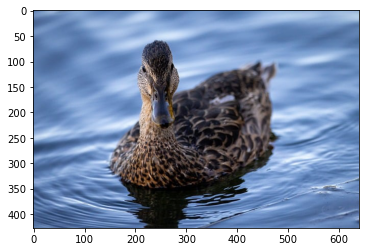

In [12]:
im = read_im(pathlib.Path("images", "duck.jpeg"))
plt.imshow(im)

In [13]:
def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3

    # set image dimensions: height, width, channel(3), and kernel shape
    H,W,C = im.shape
    K = kernel.shape[0]

    # zero handling 
    image_convolved = np.zeros_like(im)
    

    for y in range(H):
        for x in range(W):

            # color
            rgb_color = [0,0,0]

            for i in range(K):
                for j in range(K):
                    img_y = y + i - (K // 2)
                    img_x = x + j - (K // 2)

                    if 0 <= img_y < H and 0 <= img_x < W:
                        for c in range(C):
                            rgb_color[c] += im[img_y, img_x, c] * kernel[i, j]
                            image_convolved[y,x,c] = rgb_color[c]                               

    return image_convolved

In [14]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

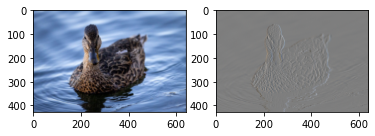

In [15]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()